<h3>Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h3> Data anlysis

In [4]:
df = pd.read_csv('digital_habits_vs_mental_health.csv')

In [5]:
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


In [6]:
df.shape

(100000, 6)

In [7]:
df.isnull().sum()

screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
mood_score                     0
dtype: int64

<h5> There is no null value. So, no worries to remove or replace them.


In [8]:
df.dtypes

screen_time_hours              float64
social_media_platforms_used      int64
hours_on_TikTok                float64
sleep_hours                    float64
stress_level                     int64
mood_score                       int64
dtype: object

<h5>There is no Categorical data also so we move further otherwise we have to encode it before training.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [10]:
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.003505,2.997820,2.401433,6.988489,6.179590,9.06076
std,1.987073,1.414452,1.079111,1.466330,2.045409,1.27847
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.00000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.00000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.00000
75%,7.300000,4.000000,3.100000,8.000000,8.000000,10.00000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.00000


In [11]:
df['mood_score'].value_counts()

mood_score
10    54040
9     18829
8     13721
7      8104
6      3654
5      1249
4       347
3        50
2         6
Name: count, dtype: int64

<h3> Data Vizualization.

In [12]:
def plot_features(dataset):
   #(boxplot, histogram+kde, violin, kde plot)
    fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=4, figsize=(20, len(dataset.columns) * 3))
    
    for i, feature in enumerate(dataset.columns):
        # Boxplot
        sns.boxplot(data=dataset, x=feature, ax=axes[i,0], color='#4a90e2')
        axes[i,0].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='semibold')
        axes[i,0].set_xlabel('')
        axes[i,0].set_ylabel('')

        # Histogram with KDE
        sns.histplot(data=dataset, x=feature, ax=axes[i,1], kde=True, color='#7b68ee')
        axes[i,1].set_title(f'Histogram & KDE', fontsize=14, fontweight='semibold')
        axes[i,1].set_xlabel('')
        axes[i,1].set_ylabel('')

        # Violin plot
        sns.violinplot(data=dataset, x=feature, ax=axes[i,2], color='#50c878')
        axes[i,2].set_title(f'Violin plot', fontsize=14, fontweight='semibold')
        axes[i,2].set_xlabel('')
        axes[i,2].set_ylabel('')

        # KDE plot only
        sns.kdeplot(data=dataset, x=feature, ax=axes[i,3], fill=True, color='#e07a5f')
        axes[i,3].set_title(f'KDE plot', fontsize=14, fontweight='semibold')
        axes[i,3].set_xlabel('')
        axes[i,3].set_ylabel('')

    plt.tight_layout(pad=4.0)
    plt.show()

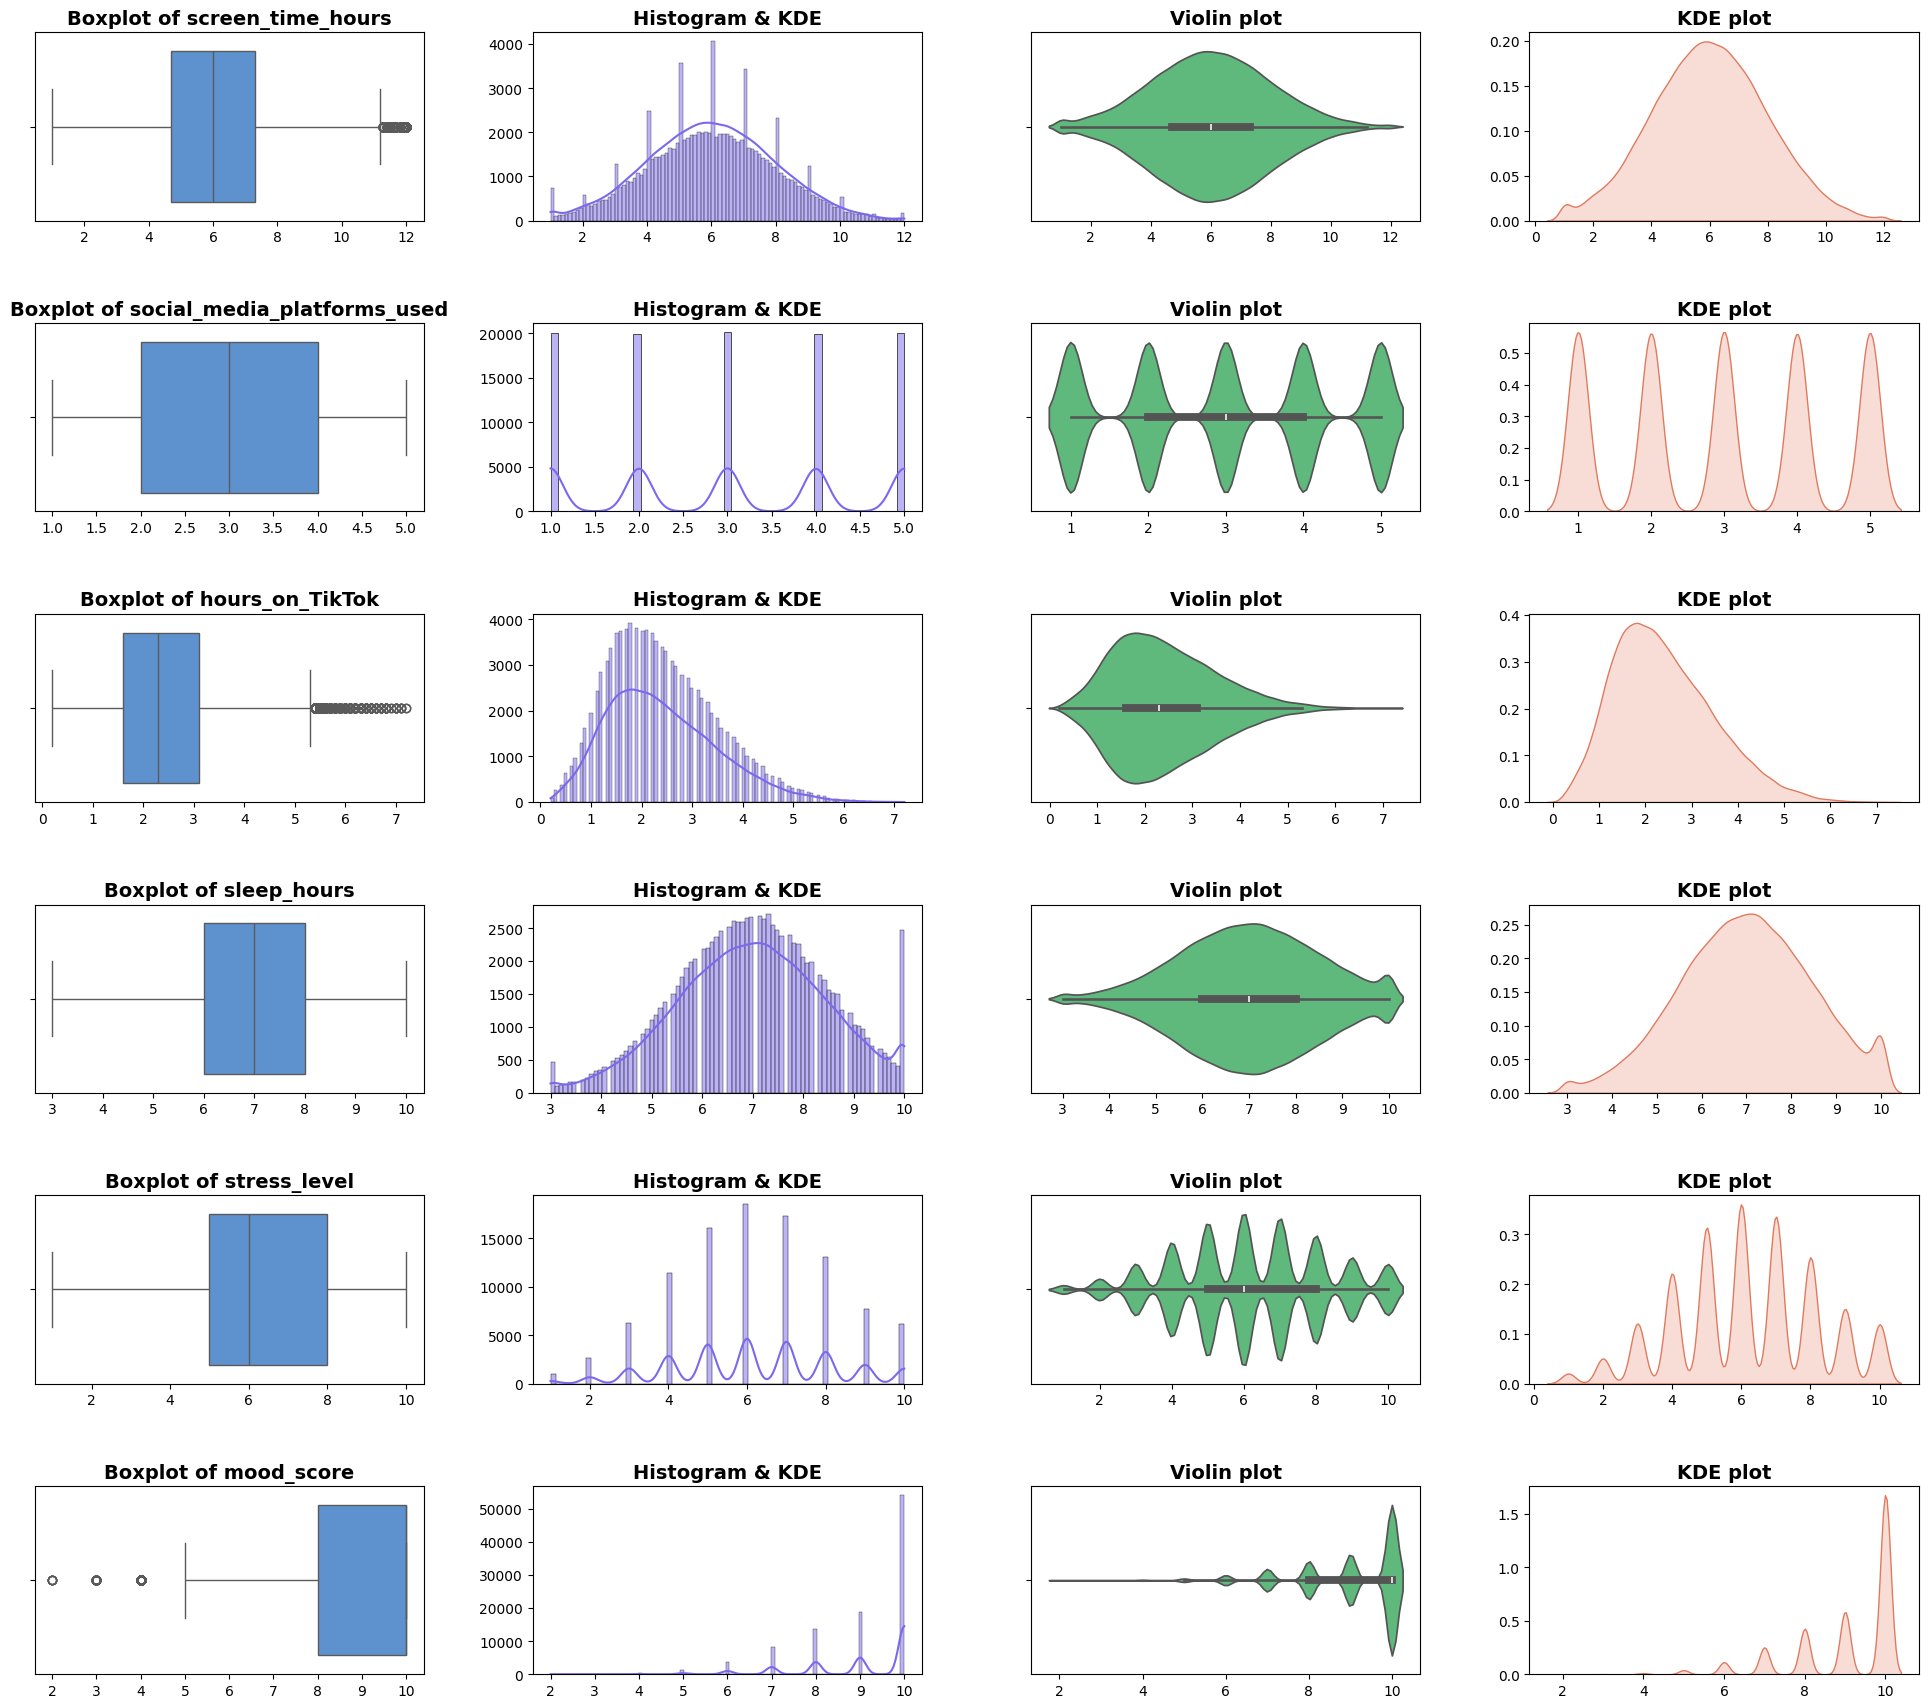

In [13]:
plot_features(df)

<Axes: xlabel='mood_score'>

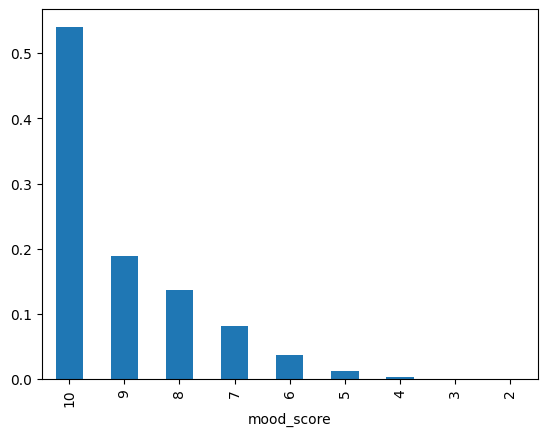

In [14]:
df['mood_score'].value_counts(normalize=True).plot(kind='bar')

<h4> Removing the Outliers

In [15]:
def outlier_finder(data_sample):
    for feature in data_sample.columns:
        q1 = data_sample[feature].quantile(0.25)
        q3 = data_sample[feature].quantile(0.75)
        iqr = q3 - q1
        min_val = q1 - (1.5 * iqr)
        max_val = q3 + (1.5 * iqr)
        
        # Find outliers
        outliers = data_sample[(data_sample[feature] < min_val) | (data_sample[feature] > max_val)]
        
        print(f"Number of Outliers in {feature}: {len(outliers)}")
outlier_finder(df)

Number of Outliers in screen_time_hours: 414
Number of Outliers in social_media_platforms_used: 0
Number of Outliers in hours_on_TikTok: 945
Number of Outliers in sleep_hours: 0
Number of Outliers in stress_level: 0
Number of Outliers in mood_score: 403


In [16]:
def outlier_remover(data_sample):
    for feature in data_sample.columns:
        q1 = data_sample[feature].quantile(0.25)
        q3 = data_sample[feature].quantile(0.75)
        iqr = q3 - q1
        min_val = q1 - (1.5 * iqr)
        max_val = q3 + (1.5 * iqr)
        data_sample = data_sample[(data_sample[feature] >= min_val) & (data_sample[feature] <= max_val)]
        return data_sample

data = outlier_remover(df) # can use to remover the outliers.

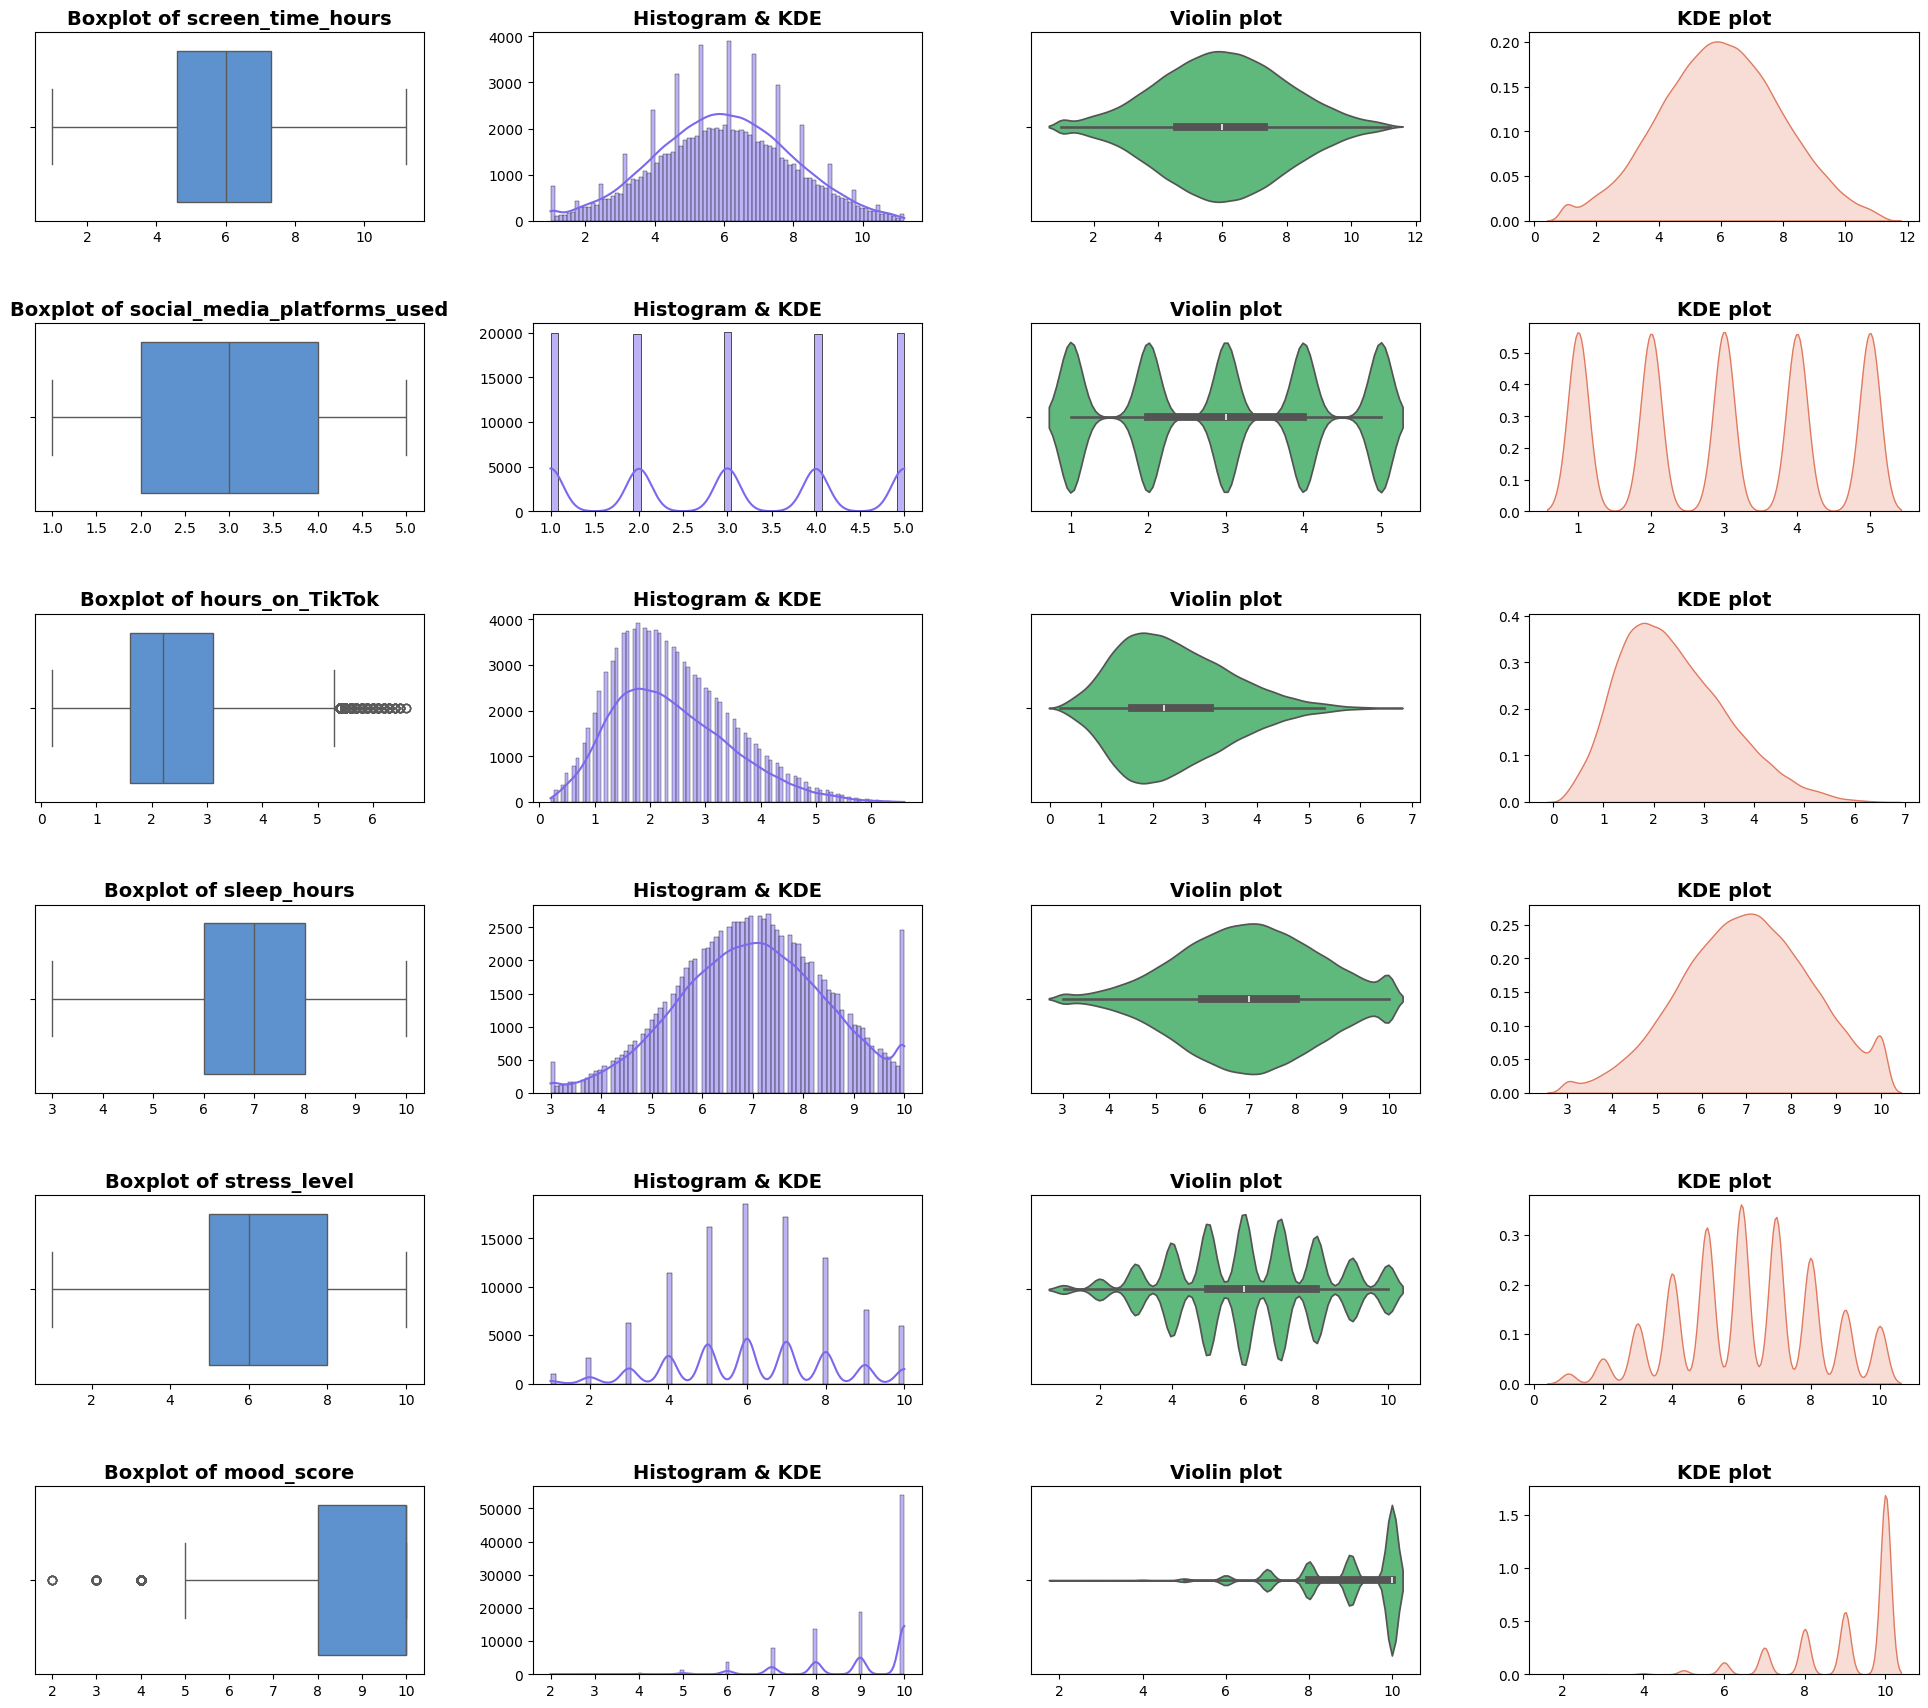

In [17]:
plot_features(data)

In [23]:
data['mood_score'].value_counts()

mood_score
10    53980
9     18760
8     13629
7      8021
6      3596
5      1215
4       333
3        46
2         6
Name: count, dtype: int64

In [24]:
df = data.copy()

<Axes: >

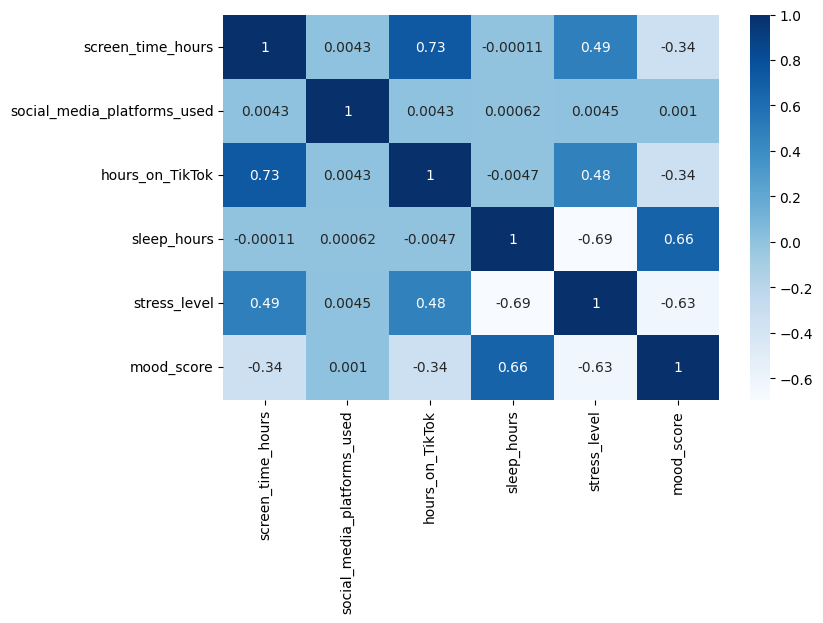

In [25]:
cmap = sns.diverging_palette(10,10, as_cmap=True)
corr= df.corr()
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr,cmap='Blues',annot=True)

### Model Selection.

In [27]:
X = df.drop(columns=['mood_score'],axis = 1)
Y = df['mood_score']

In [34]:
# Data splitiing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import classification_report

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=21,test_size=0.2)

In [36]:
print(f"{x_train.shape},{y_train.shape},{x_test.shape},{y_test.shape}")

(79668, 5),(79668,),(19918, 5),(19918,)


In [39]:
# Building pipelins.

dt=DecisionTreeClassifier()

rf=RandomForestClassifier()

knn=KNeighborsClassifier()

lr = LogisticRegression()

gnb = GaussianNB()


# List of the models
models = [dt, rf, knn, lr,gnb]

# Pipeliline model names
model_dict = {0: "DecisionTree", 1: "RandomForest",2: "KNeighbors", 3: "Logistic Regression", 4: "Gaussian NB"}


In [40]:
acc_train = []
acc_test = []
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train,y_train)
    accuracy_test = model.score(x_test,y_test)
    acc_train.append(accuracy_train*100)
    acc_test.append(accuracy_test*100)
    print(f"{model_dict[i]}:\nTraining --->  {accuracy_train * 100}%")
    print(f"For test --->  {accuracy_test * 100}%\n")

DecisionTree:
Training --->  98.84395240247025%
For test --->  53.15794758509891%

RandomForest:
Training --->  98.84395240247025%
For test --->  59.16256652274324%

KNeighbors:
Training --->  71.20926846412613%
For test --->  57.55095893161965%

Logistic Regression:
Training --->  62.75292463724457%
For test --->  62.360678783010336%

Gaussian NB:
Training --->  60.775970276648096%
For test --->  60.30725976503665%



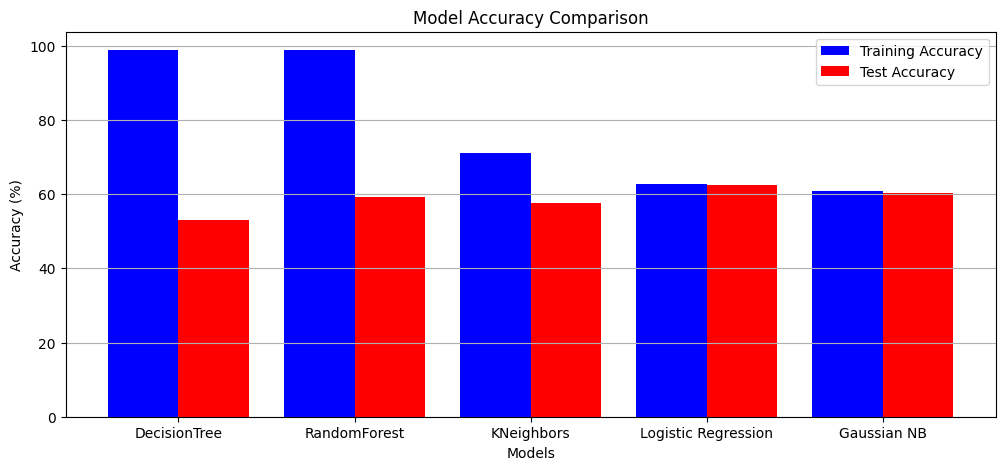

In [41]:
x = range(len(model_dict))
plt.figure(figsize=(12,5))
plt.bar(x, acc_train, width=0.4, label='Training Accuracy', color='b', align='center')
plt.bar([p + 0.4 for p in x], acc_test, width=0.4, label='Test Accuracy', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks([p + 0.2 for p in x], list(model_dict.values()))
plt.grid(axis = 'y')
plt.legend()
plt.show()

<h4> Hyper Tuning the Models.

In [43]:
# Define parameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
param_grid_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}


In [44]:
# Random Search CV

random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid_rf)
random_search_rf.fit(x_train, y_train)

random_search_logistic = RandomizedSearchCV(LogisticRegression(),
                                   param_grid_logistic)
random_search_logistic.fit(x_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [45]:
# Random Forest Model
print("Best parameters found: ", random_search_rf.best_params_, "\n")
best_rf = random_search_rf.best_estimator_
print(best_rf)

model_random = best_rf
model_random.fit(x_train, y_train)
print("The traning accuracy of hypertuned rf model is: ",model_random.score(x_train,y_train)*100)
print("The testing accuracy of hypertuned rf model is: ",model_random.score(x_test,y_test)*100)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 10} 

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)
The traning accuracy of hypertuned rf model is:  66.57001556459306
The testing accuracy of hypertuned rf model is:  62.53137865247515


In [46]:
# Logistic regressor Model
print("Best parameters found: ", random_search_logistic.best_params_, "\n")
best_lr = random_search_logistic.best_estimator_
print(best_lr)

model_logistic = best_lr
model_logistic.fit(x_train, y_train)
print("The traning accuracy of hypertuned rf model is: ",model_logistic.score(x_train,y_train)*100)
print("The testing accuracy of hypertuned rf model is: ",model_logistic.score(x_test,y_test)*100)

Best parameters found:  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': np.float64(1.623776739188721)} 

LogisticRegression(C=np.float64(1.623776739188721), max_iter=1000, penalty='l1',
                   solver='saga')
The traning accuracy of hypertuned rf model is:  63.35668022292514
The testing accuracy of hypertuned rf model is:  63.168992870770154


In [47]:
def feature_importance(model):
    importances = model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
    feat_imp_df.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 5))
    plt.title(f"{model} Feature Importances")
    plt.tight_layout()
    plt.show()

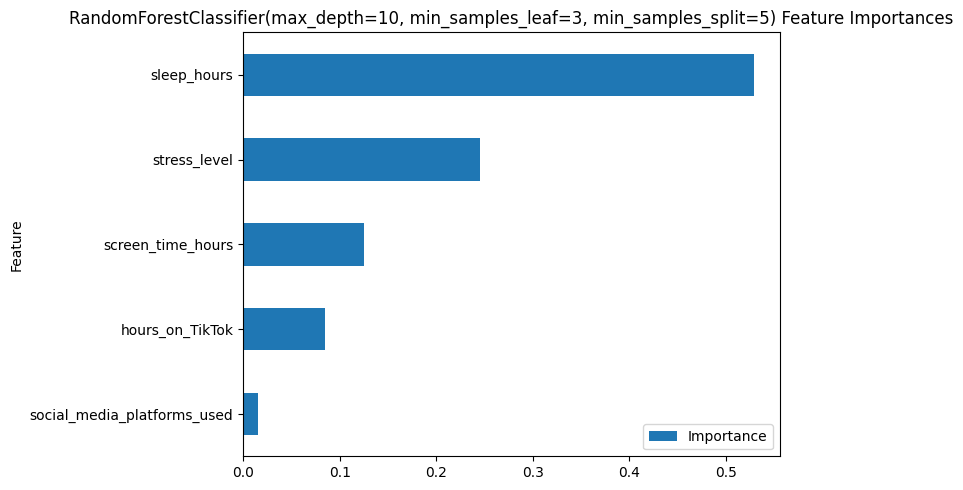

In [48]:
feature_importance(model_random)

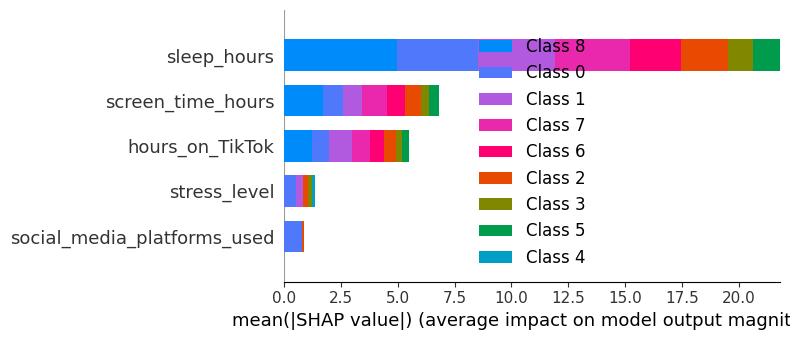

In [49]:
import shap
shap.initjs()

# SHAP for Logistic Regression
explainer_logistic = shap.LinearExplainer(model_logistic, x_train)#, feature_perturbation="interventional")
shap_values_logistic = explainer_logistic(x_test)

shap.summary_plot(shap_values_logistic, x_test)

### Upsampling the minority classes.

In [51]:
df_sample = df.copy()

In [52]:
import pandas as pd
from sklearn.utils import resample

# Assuming you have a DataFrame called df_test with a 'mood_score' column
# and other features...

# Step 1: Determine the target count (maximum class count)
target_count = df_sample['mood_score'].value_counts().max()

# Step 2: Separate the data by class
dfs = [df_sample[df_sample['mood_score'] == label] for label in df_sample['mood_score'].unique()]

# Step 3: Upsample each class to the target count
upsampled_dfs = [
    resample(group, 
             replace=True,          # sample with replacement
             n_samples=target_count, 
             random_state=42)       # reproducibility
    for group in dfs
]

# Step 4: Concatenate all upsampled classes
df_upsampled = pd.concat(upsampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Check the result
print(df_upsampled['mood_score'].value_counts())


mood_score
4     53980
8     53980
7     53980
10    53980
6     53980
9     53980
3     53980
5     53980
2     53980
Name: count, dtype: int64


In [53]:
X_sample = df_upsampled.drop(columns=['mood_score'],axis = 1)
Y_sample = df_upsampled['mood_score']

In [54]:
x_train_sample,x_test_sample,y_train_sample,y_test_sample = train_test_split(X_sample,Y_sample,random_state=21,test_size=0.2)

In [55]:
acc_train = []
acc_test = []
for i, model in enumerate(models):
    model.fit(x_train_sample, y_train_sample)
    accuracy_train = model.score(x_train_sample,y_train_sample)
    accuracy_test = model.score(x_test_sample,y_test_sample)
    acc_train.append(accuracy_train*100)
    acc_test.append(accuracy_test*100)
    print(f"{model_dict[i]}:\nTraining --->  {accuracy_train * 100}%")
    print(f"For test --->  {accuracy_test * 100}%\n")

DecisionTree:
Training --->  99.47176937960562%
For test --->  96.92272858260262%

RandomForest:
Training --->  99.47151208266436%
For test --->  97.22428059775226%

KNeighbors:
Training --->  94.32274299123132%
For test --->  89.86661726565394%

Logistic Regression:
Training --->  41.66512288501914%
For test --->  41.583302457700384%

Gaussian NB:
Training --->  34.96922728582603%
For test --->  35.025318019019394%



In [68]:
#XgBoost

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

x = df_upsampled.drop(columns = ['mood_score'])
y = df_upsampled['mood_score']

# Assume y contains values like [2, 3, ..., 10]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train_xgb,x_test_xgb,y_train_xgb,y_test_xgb = train_test_split(x,y_encoded,random_state=21,test_size=0.2)

# Now y_encoded contains [0, 1, ..., 8]
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(x_train_xgb,y_train_xgb)

print(f"XGBoost:\nTraining --->  {model.score(x_train,y_train) * 100}%")
print(f"For test --->  {model.score(x_test,y_test) * 100}%\n")


XGBoost:
Training --->  53.47316362906061%
For test --->  53.102721156742646%



In [56]:
# Define the model
d_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter space
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None] + list(np.arange(3, 30)),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Setup RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=d_tree,
    param_distributions=param_dist_dt,
    n_iter=100,               # number of parameter settings to sample
    scoring='accuracy',       # you can change this to 'f1', 'roc_auc', etc.
    cv=5,                     # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1                 # use all processors
)

# Fit on training data
random_search_dt.fit(x_train_sample, y_train_sample)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, np.int64(3),
                                                      np.int64(4), np.int64(5),
                                                      np.int64(6), np.int64(7),
                                                      np.int64(8), np.int64(9),
                                                      np.int64(10),
                                                      np.int64(11),
                                                      np.int64(12),
                                                      np.int64(13),
                                                      np.int64(14),
                                                      np.int64(15),
                                                      np.int64(16)...
                                                      np.int64(23),
                                                      np.int64(24),
                                                      np.int64(25),
                                                      np.int64(26),
                                                      np.int64(27),
                                                      np.int64(28),
                                                      np.int64(29)],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=2)

In [57]:
print("Best parameters found: ", random_search_dt.best_params_, "\n")

best_dt = random_search_dt.best_estimator_
print(best_dt)

Best parameters found:  {'splitter': 'best', 'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(1), 'max_features': None, 'max_depth': np.int64(28), 'criterion': 'log_loss'} 

DecisionTreeClassifier(criterion='log_loss', max_depth=np.int64(28),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(3), random_state=42)


In [58]:
model_dt = best_dt
model_dt.fit(x_train_sample, y_train_sample)
print("The traning accuracy of hypertuned rf model is: ",model_dt.score(x_train_sample,y_train_sample)*100)
print("The testing accuracy of hypertuned rf model is: ",model_dt.score(x_test_sample,y_test_sample)*100)

The traning accuracy of hypertuned rf model is:  99.31764851179449
The testing accuracy of hypertuned rf model is:  96.75085422584496


In [59]:
print(f'The Calssification report of {model_dt}:\n')
y_pred_dt = model_dt.predict(x_test_sample)
print(classification_report(y_test_sample, y_pred_dt))

The Calssification report of DecisionTreeClassifier(criterion='log_loss', max_depth=np.int64(28),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(3), random_state=42):

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     10758
           3       1.00      1.00      1.00     10860
           4       1.00      1.00      1.00     10844
           5       0.99      1.00      1.00     10870
           6       0.99      0.99      0.99     10775
           7       0.96      0.99      0.98     10773
           8       0.93      0.96      0.94     10861
           9       0.88      0.92      0.90     10659
          10       0.96      0.85      0.90     10764

    accuracy                           0.97     97164
   macro avg       0.97      0.97      0.97     97164
weighted avg       0.97      0.97      0.97     97164



Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20} 

RandomForestClassifier(max_depth=20)

In [60]:
model_random = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=20
)
model_random.fit(x_train_sample,y_train_sample)
print("The traning accuracy of hypertuned rf model is: ",model_random.score(x_train_sample,y_train_sample)*100)
print("The testing accuracy of hypertuned rf model is: ",model_random.score(x_test_sample,y_test_sample)*100)

The traning accuracy of hypertuned rf model is:  99.28986044213907
The testing accuracy of hypertuned rf model is:  96.9669836564983


In [61]:
print(f'The Calssification report of {model_random}:\n')
y_pred_rf = model_random.predict(x_test_sample)
print(classification_report(y_test_sample, y_pred_rf))

The Calssification report of RandomForestClassifier(max_depth=20):

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     10758
           3       1.00      1.00      1.00     10860
           4       1.00      1.00      1.00     10844
           5       0.99      1.00      1.00     10870
           6       0.99      0.99      0.99     10775
           7       0.97      0.99      0.98     10773
           8       0.94      0.95      0.94     10861
           9       0.88      0.92      0.90     10659
          10       0.96      0.87      0.92     10764

    accuracy                           0.97     97164
   macro avg       0.97      0.97      0.97     97164
weighted avg       0.97      0.97      0.97     97164



In [62]:
print(f'The Calssification report of {model_random}:\n')
y_pred_rf = model_random.predict(x_test_sample)
print(classification_report(y_test_sample, y_pred_rf))

The Calssification report of RandomForestClassifier(max_depth=20):

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     10758
           3       1.00      1.00      1.00     10860
           4       1.00      1.00      1.00     10844
           5       0.99      1.00      1.00     10870
           6       0.99      0.99      0.99     10775
           7       0.97      0.99      0.98     10773
           8       0.94      0.95      0.94     10861
           9       0.88      0.92      0.90     10659
          10       0.96      0.87      0.92     10764

    accuracy                           0.97     97164
   macro avg       0.97      0.97      0.97     97164
weighted avg       0.97      0.97      0.97     97164



In [69]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,               # Number of parameter settings sampled
    scoring='accuracy',      # Metric to optimize
    cv=3,                    # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(x_train_xgb, y_train_xgb)

print("Best parameters found: ", random_search_xgb.best_params_, "\n")

best_xgb = random_search_xgb.best_estimator_
print(best_xgb)

model_xgb = best_xgb
model_xgb.fit(x_train_xgb, y_train_xgb)
print("The traning accuracy of hypertuned rf model is: ",model_xgb.score(x_train_xgb,y_train_xgb)*100)
print("The testing accuracy of hypertuned rf model is: ",model_xgb.score(x_test_xgb,y_test_xgb)*100)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=

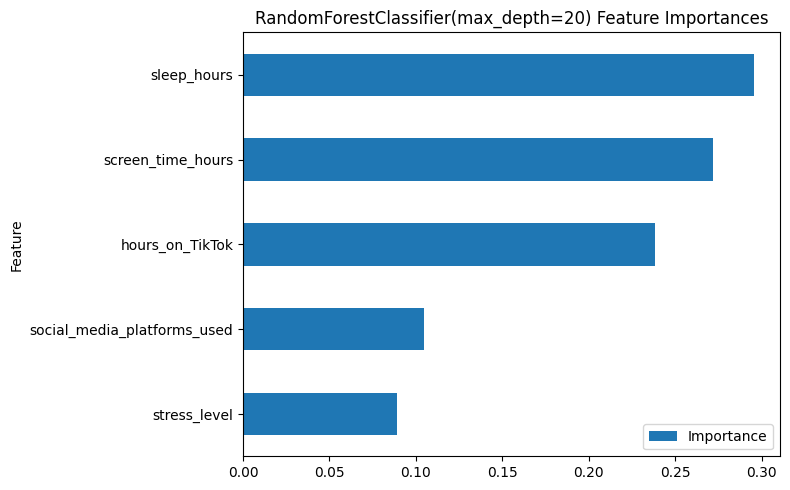

In [63]:
feature_importance(model_random)

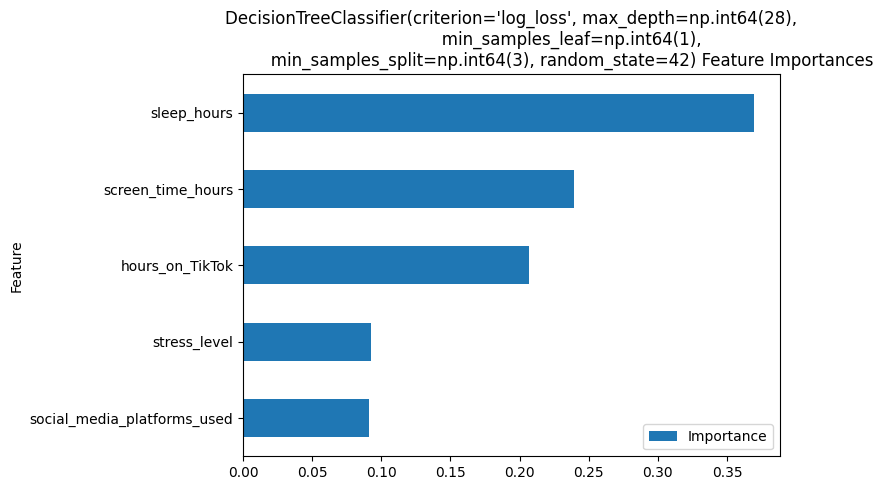

In [64]:
feature_importance(model_dt)

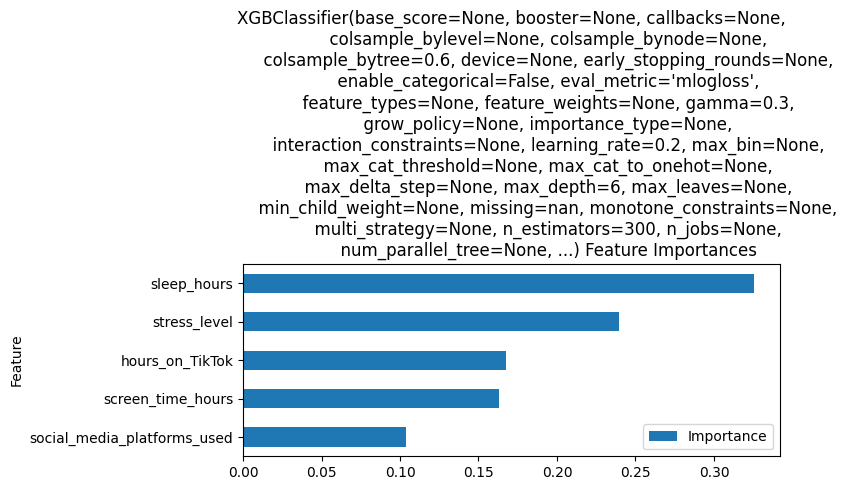

In [70]:
feature_importance(model_xgb)

In [96]:
import pickle

# save Hypertuned Random forest model
with open("random_model.pkl", "wb") as f:
    pickle.dump(model_random,f)

# save Hypertuned decision Tree model 
with open("dt_model.pkl", "wb") as f:
    pickle.dump(model_dt,f)

# save Hypertuned XG Boost model 
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model_xgb,f)

### Model Testing

In [72]:
sorted(df['mood_score'].unique())

[np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

In [88]:
import numpy as np

def row_extractor(dataset, feature, target, number_rows):
    # Filter rows matching the target class
    df_filtered = dataset[dataset[feature] == target]

    # Randomly sample rows
    sampled_rows = df_filtered.sample(n=number_rows, random_state=21)

    # Extract only values (without index/column labels)
    row_values = sampled_rows.values

    # Convert np.float64 to float, leave other types unchanged
    clean_rows = [[float(x) if isinstance(x, np.float64) else x for x in row] for row in row_values]

    return clean_rows

df_test = pd.DataFrame()
y_testing = []
for i in sorted(df['mood_score'].unique()):

    df0 = row_extractor(df,'mood_score',i,4)

    # Remove the last element from each array
    cleaned_df0 = [arr[:-1] for arr in df0]
    y_testing.append([arr[5:6] for arr in df0])

    # Convert to a DataFrame
    df0 = pd.DataFrame(cleaned_df0)
    df0.columns = x_train.columns

    # print(y_testing)

    # Assume df1 and df2 are your two DataFrames
    df_test = pd.concat([df_test, df0], axis=0, ignore_index=True)
    # df_testing.columns = X_train.columns


In [89]:
y_testing

[[[2.0], [2.0], [2.0], [2.0]],
 [[3.0], [3.0], [3.0], [3.0]],
 [[4.0], [4.0], [4.0], [4.0]],
 [[5.0], [5.0], [5.0], [5.0]],
 [[6.0], [6.0], [6.0], [6.0]],
 [[7.0], [7.0], [7.0], [7.0]],
 [[8.0], [8.0], [8.0], [8.0]],
 [[9.0], [9.0], [9.0], [9.0]],
 [[10.0], [10.0], [10.0], [10.0]]]

In [90]:
df_test.head(2)

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level
0,8.8,5.0,4.7,3.8,10.0
1,9.6,1.0,4.8,3.0,10.0


In [97]:
import joblib

model_rf = joblib.load('random_model.pkl')
model_dt = joblib.load('dt_model.pkl')
model_xgb = joblib.load('xgb_model.pkl')

loaded_model = [model_rf,model_dt,model_xgb]

X_new = df_test

for model in loaded_model:
    y_predict= model.predict(X_new)
    print(f"The outcomes of {model} is :\n")
    print(y_predict,"\n")


The outcomes of RandomForestClassifier(max_depth=20) is :

[ 2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7
  8  9  8  8  9  9  9  9 10 10 10 10] 

The outcomes of DecisionTreeClassifier(criterion='log_loss', max_depth=np.int64(28),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(3), random_state=42) is :

[ 2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7
  8 10  8  8  9 10  9  9 10 10 10 10] 

The outcomes of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_t

<h4>The favourable outcome sholud be the number in increasing and repeated 4 times.

In [92]:
best_model = model_rf